Code for a Kaggle competition that classifies academic success. I implemented RFC, SVM, XGB, and Multi-Layer Perceptron. 

Originally edited/created June 20-21, 2024

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skm
import tensorflow as tf
from sklearn import svm
import xgboost as xgb

## data overview + preprocessing

In [ ]:
# read in files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [ ]:
#
#train.head()
#train.info()
#train.columns
train.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [ ]:
train.dropna()
test.dropna()
train.drop_duplicates()
test.drop_duplicates()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.0,1,38,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51008,127526,2,39,1,9119,1,19,133.1,1,19,...,0,0,5,5,0,0.000000,0,9.4,-0.8,-3.12
51009,127527,1,1,1,171,1,1,127.0,1,1,...,0,0,0,0,0,0.000000,0,15.5,2.8,-4.06
51010,127528,1,1,3,9773,1,1,132.0,1,19,...,0,0,6,9,3,13.000000,0,7.6,2.6,0.32


In [ ]:
train.drop(labels = ['id'], axis = 1, inplace = True)
test.drop(labels = ['id'], axis = 1, inplace = True)

### heatmap w/o considering categorical

<Axes: >

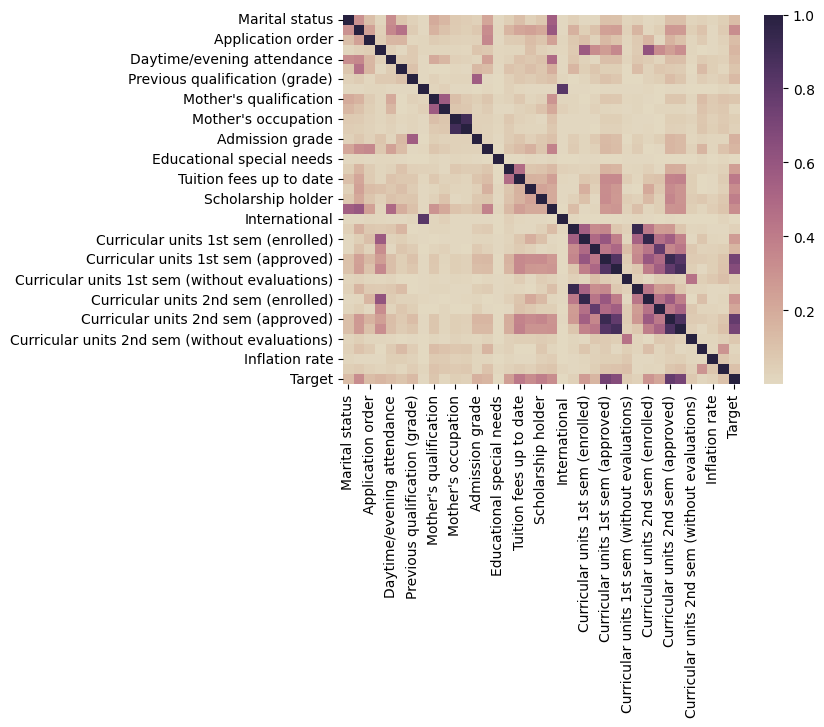

In [ ]:
df_corr = train
df_corr['Target'].replace(to_replace = ['Dropout', 'Enrolled', 'Graduate'], value = [0, 1, 2], inplace = True)
corr = abs(df_corr.corr())
sns.heatmap(corr, cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [ ]:
heatmap = px.imshow(corr, text_auto=True, labels = dict(color = "Correlation"), width = 1000, height = 1000)
heatmap.update_layout(yaxis_title=None)
heatmap.update_layout(xaxis_title=None)
heatmap.show()

### heatmap w/ categorical (DON'T RUN)

In [ ]:
train.columns

Index(['Application mode', 'Application order', 'Course', 'Admission grade',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Gender',
       'Scholarship holder', 'Age at enrollment',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'GDP', 'Target'],
      dtype='object')

In [ ]:
df_c2 = train
categoricals = ['Application mode', 'Course']
df_c2[categoricals] = str(df_c2[categoricals])
df_c2[categoricals] = pd.get_dummies(categoricals)
corr2 = abs(df_c2.corr())

In [ ]:
heatmap2 = px.imshow(corr2, text_auto=True, labels = dict(color = "Correlation"), width = 1000, height = 1000)
heatmap2.update_layout(yaxis_title=None)
heatmap2.update_layout(xaxis_title=None)
heatmap2.show()

## dropping!

In [ ]:
# from heatmap, decide to drop...
to_drop = ['International', 'Marital status', 'Daytime/evening attendance', 'Previous qualification', 'Curricular units 1st sem (without evaluations)',
 'Previous qualification (grade)', "Father's qualification", "Father's occupation", 'Unemployment rate',
 'Nacionality', "Mother's occupation", 'Educational special needs', 'Curricular units 2nd sem (without evaluations)',
 'Inflation rate', "Mother's qualification", 'Application mode', 'Course']
#to_drop = []
df_corr.drop(labels = to_drop, axis = 1, inplace = True)
corr = abs(df_corr.corr())

In [ ]:
# scatterplots to determine esn drop
# decided to drop educational special needs and 2nd sem (without evals)
esn = px.scatter(x = df_corr["Mother's qualification"], y = df_corr['Target'])
esn.show()

KeyError: "Mother's qualification"

## split data

In [ ]:
train['Target'].replace(to_replace = ['Dropout', 'Enrolled', 'Graduate'], value = [0, 1, 2], inplace = True)

In [ ]:
train['Target'].replace(value = ['Dropout', 'Enrolled', 'Graduate'], to_replace = [0, 1, 2], inplace = True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['Target'], axis = 1), train['Target'], test_size = 0.2)

## random forest classifier

In [ ]:
NUM_TREES = 100
MAX_DEPTH = 15
CRITERION = 'entropy'
model_rfc = RandomForestClassifier(n_estimators = NUM_TREES, max_depth = MAX_DEPTH, criterion=CRITERION, random_state = 82)

In [ ]:
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)

## svm

In [ ]:
y_train

73369    2
51411    2
56981    1
52268    0
62315    2
        ..
60306    2
57190    0
33076    2
66419    1
25165    0
Name: Target, Length: 61214, dtype: int64

In [ ]:
model_svm = svm.SVC(decision_function_shape='ovo', random_state = 82)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

## XGB

In [ ]:
model_xgb = xgb.XGBClassifier(tree_method="exact", sampling_method = 'gradient_based', eta = 0.1)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)
y_pred_xgb = pd.DataFrame(y_pred_xgb)
y_pred_xgb = y_pred_xgb.idxmax(axis=1)

## Multi-Layer Perceptron Model

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
y_train = pd.get_dummies(y_train)
#y_test = pd.get_dummies(y_test)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61214 entries, 20526 to 454
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Application order                       61214 non-null  int64  
 1   Admission grade                         61214 non-null  float64
 2   Displaced                               61214 non-null  int64  
 3   Debtor                                  61214 non-null  int64  
 4   Tuition fees up to date                 61214 non-null  int64  
 5   Gender                                  61214 non-null  int64  
 6   Scholarship holder                      61214 non-null  int64  
 7   Age at enrollment                       61214 non-null  int64  
 8   Curricular units 1st sem (credited)     61214 non-null  int64  
 9   Curricular units 1st sem (enrolled)     61214 non-null  int64  
 10  Curricular units 1st sem (evaluations)  61214 non-null  int64

In [ ]:
model_mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (19, )),
    tf.keras.layers.Dense(128, activation = 'leaky_relu'),
    tf.keras.layers.Dense(256, activation = 'leaky_relu'),
    tf.keras.layers.Dense(128, activation = 'leaky_relu'),
    tf.keras.layers.Dense(64, activation = 'leaky_relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [ ]:
model_mlp.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 7)

In [ ]:
model_mlp.fit(X_train, y_train, epochs = 100, batch_size = 100, validation_split = 0.2, callbacks = early_stopping)

Epoch 1/100
490/490 [==============================] - 5s 6ms/step - loss: 0.6564 - accuracy: 0.7639 - val_loss: 0.5112 - val_accuracy: 0.7965
Epoch 2/100
490/490 [==============================] - 2s 5ms/step - loss: 0.5136 - accuracy: 0.7964 - val_loss: 0.5034 - val_accuracy: 0.8051
Epoch 3/100
490/490 [==============================] - 2s 4ms/step - loss: 0.5022 - accuracy: 0.8027 - val_loss: 0.4862 - val_accuracy: 0.8130
Epoch 4/100
490/490 [==============================] - 2s 4ms/step - loss: 0.4972 - accuracy: 0.8047 - val_loss: 0.5165 - val_accuracy: 0.8058
Epoch 5/100
490/490 [==============================] - 2s 4ms/step - loss: 0.4941 - accuracy: 0.8057 - val_loss: 0.5210 - val_accuracy: 0.7798
Epoch 6/100
490/490 [==============================] - 2s 4ms/step - loss: 0.4904 - accuracy: 0.8092 - val_loss: 0.5407 - val_accuracy: 0.7918
Epoch 7/100
490/490 [==============================] - 3s 6ms/step - loss: 0.4858 - accuracy: 0.8107 - val_loss: 0.4777 - val_accuracy: 0.8147

In [ ]:
y_pred_mlp = model_mlp.predict(X_test)
y_pred_mlp = pd.DataFrame(y_pred_mlp)
y_pred_mlp = y_pred_mlp.idxmax(axis=1)

479/479 [==============================] - 1s 2ms/step


In [ ]:
y_test = y_test.replace(to_replace = ['Dropout', 'Enrolled', 'Graduate'], value = [0, 1, 2])

In [ ]:
y_test = y_test.replace(value = ['Dropout', 'Enrolled', 'Graduate'], to_replace = [0, 1, 2])

## evaluation

In [ ]:
evaluation_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Confusion Matrix'])

In [ ]:
def evaluate(df, name, y_pred, y_test):
  acc = str(skm.accuracy_score(y_test, y_pred))
  #prec = str(skm.precision_score(y_test, y_pred))
  #recall = str(skm.recall_score(y_test, y_pred))
  #f1 = str(skm.f1_score(y_test, y_pred))
  conf = str(skm.confusion_matrix(y_test, y_pred))
  df.loc[int(len(df.index))] = [name, acc, conf]
  return df

In [ ]:
evaluate(evaluation_df, "SVM", y_pred_svm, y_test)

In [ ]:
evaluate(evaluation_df, "Random Forest Classifier", y_pred_rfc, y_test)

In [ ]:
evaluate(evaluation_df, "XGB", y_pred_xgb, y_test)

In [ ]:
evaluate(evaluation_df, "Multi Layer Perceptron Model", y_pred_mlp, y_test)

,Model,Accuracy,Confusion Matrix
0,Random Forest Classifier,0.8252744380554103,[[4140 576 358]\n [ 313 1829 862]\n [ 111 ...
1,XGB,0.8117485624673288,[[4332 440 302]\n [ 718 1590 696]\n [ 375 ...
2,Multi Layer Perceptron Model,0.8191975953998955,[[4114 670 290]\n [ 288 2017 699]\n [ 119 ...
